# Project 2: Data Wrangling- WeRateDogs 

## Gather

#### This section focuses on gathering the data used in this project
The first Data is provided as a 'csv file' and downloaded manually, the second data is 'tsv file' that was downloaded programmatically by requesting from a given url [20] while the third data was obtained from the udacity classroom because of verification issues.

In [82]:
#Import needed library
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
#Import Request for the Image prediction tsv file
import requests
import os
#Creates a new folder in the directory
folder_name = 'MyTwitterProjectFile'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
#Write the file to the Folder 'my_folder'
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [ ]:
#Twitter API Data Extraction 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
#Loop through the Json.txt file and Create a Pandas DataFrame
import json
import glob

tweets_list = []

with open('tweet-json.txt', 'r') as file:
  for line in file:
    data = json.loads(line)
    tweets_list.append(data)

#Creates a Pandas DataFrame for tweet-json file
t_retweet = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])

In [7]:
#Creates a Pandas Dataframe for Twitter Achieve Enhanced file
t_entwach = pd.read_csv('twitter-archive-enhanced.csv')

In [8]:
#Creates a Pandas Dataframe for Image Predictions file
t_imgpred = pd.read_csv('image-predictions.tsv', sep='\t') #Image Predictions Document

## Assess

In [9]:
t_retweet.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [53]:
t_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [13]:
t_retweet.sample(5)

,id,retweet_count,favorite_count
20,887705289381826560,5609,30779
2252,667782464991965184,261,434
510,811985624773361665,1647,8102
680,788765914992902144,12014,30658
1289,708119489313951744,1102,2937


In [88]:
(t_retweet==0).sum()

id                  0
retweet_count       1
favorite_count    179
dtype: int64

In [7]:
t_entwach.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [151]:
t_entwach.tweet_id.duplicated().sum()

7

In [161]:
a = t_entwach.tweet_id.duplicated().sort_values(ascending=False)         
a.head(10)

1895     True
1853     True
2260     True
1872     True
447      True
341      True
1941     True
1569    False
1570    False
1571    False
Name: tweet_id, dtype: bool

In [136]:
t_entwach.rating_denominator.isnull().sum()

0

In [36]:
tentwach_clean[tentwach_clean['dog_name']=='a']

,tweet_id,timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
56,881536000000000000,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913000000000000,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772582000000000000,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747886000000000000,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747817000000000000,2016-06-28 15:40:07,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746873000000000000,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743223000000000000,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717538000000000000,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733000000000000,2016-04-01 02:51:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704860000000000000,2016-03-02 02:43:09,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [37]:
tentwach_clean[tentwach_clean['dog_name']=='None']

,tweet_id,timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
5,891088000000000000,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729000000000000,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665000000000000,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343000000000000,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101000000000000,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666083000000000000,2015-11-16 02:38:37,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073000000000000,2015-11-16 01:59:36,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071000000000000,2015-11-16 01:52:02,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049000000000000,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [149]:
t_entwach.timestamp.sample(5)

1806    2015-12-16 01:27:03 +0000
2278    2015-11-19 20:14:03 +0000
1150    2016-04-30 01:41:23 +0000
415     2017-01-21 03:29:14 +0000
624     2016-11-07 03:14:10 +0000
Name: timestamp, dtype: object

In [75]:
t_entwach.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [76]:
t_entwach.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [77]:
t_entwach.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [78]:
t_entwach.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [6]:
t_entwach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [56]:
t_imgpred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [144]:
t_imgpred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1125,727314416056803329,https://pbs.twimg.com/media/Chfwmd9U4AQTf1b.jpg,2,toy_poodle,0.827469,True,miniature_poodle,0.160760,True,Tibetan_terrier,0.001731,True
1950,863079547188785154,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
678,683498322573824003,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1,Airedale,0.945362,True,Irish_terrier,0.026850,True,Lakeland_terrier,0.016826,True
1277,750086836815486976,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,Brabancon_griffon,0.003061,True
177,669214165781868544,https://pbs.twimg.com/media/CUmGu7-UcAA0r3O.jpg,1,minivan,0.435396,False,police_van,0.310143,False,minibus,0.068201,False


In [145]:
t_imgpred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [99]:
t_imgpred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [182]:
t_imgpred.p1_conf.sort_values(ascending=True)

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
          ...   
1372    0.999953
149     0.999956
1229    0.999962
1299    0.999984
106     1.000000
Name: p1_conf, Length: 2075, dtype: float64

In [57]:
t_imgpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [93]:
t_imgpred.duplicated().sum()

0

In [141]:
t_imgpred.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

#### DATA QUALITY ISSUES

**t_retweet TABLE**
- rename the id column to tweet_id to allow for merge.

**t_entwach TABLE**
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns have lots of missing data.
- errorneous datatypes (tweet_id, timestamp).
- the following columns (source, name, text) should be renamed (source as tweet_source, dog_name, tweet_text) for easy comprehension
- Drop the dog name column because there are lots of names that are inputted as 'None' and 'a'. This will also not be relevant for analysis.
- Add rating column using the numerator and denominator columns, and then drop the rating_numerator and rating_denominator columns.

**t_imgpred TABLE**
- the dogs predicted names in column p1, p2, p3 do not have consistent format; should have spaces () in between and not underscore (_)
- the names in column p1, p2, p3 should be formatted to be in title case
- the p1_conf, p2_conf, p3_conf do not have a consistent float precision.

#### TIDINESS ISSUES
- The variables splited into four columns (doggo, floofer, pupper, puppo) should be in a column named dog_stage. 
- tweet_id column data in the tretweet_clean, timgpred_clean and tentwach_clean TABLES will be adjusted to have the same corresponding figures.
- Merge the tretweet_clean and timgpred_clean TABLES with the tentwach_clean to create a twitter_achieve_master

## Clean
#### This section focuses majorly on cleaning the data quality and tidiness issues identified in section 2 (Data assessment). To do this each issue will be defined, coded and tested.

In [10]:
#It is good practice to create a copy of the Original Data
tretweet_clean = t_retweet.copy()
tentwach_clean = t_entwach.copy()
timgpred_clean = t_imgpred.copy()

### Quality Issues

#### Define

1. Rename the id column in tretweet table for consistency with other tables and to allow for merge.

#### Code

In [11]:
#Rename the id column to tweet_id
tretweet_clean = tretweet_clean.rename(columns={'id':'tweet_id'})

#### Test

In [12]:
tretweet_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


#### Define
2. Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns in the 't_entwach' table.

#### Code

In [13]:
#The listed columns will be dropped using the pandas drop column function
tentwach_clean = tentwach_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                      'retweeted_status_user_id', 'expanded_urls', 'retweeted_status_timestamp'], axis=1)

#### Test

In [14]:
tentwach_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   float64
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   rating_numerator    2356 non-null   int64  
 5   rating_denominator  2356 non-null   int64  
 6   name                2356 non-null   object 
 7   doggo               2356 non-null   object 
 8   floofer             2356 non-null   object 
 9   pupper              2356 non-null   object 
 10  puppo               2356 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 202.6+ KB


#### Define
3. Change the erroneous datatype ((tweet_id, timestamp)

#### Code 

In [15]:
#Convert tweet_id to int, timestamp to datetime64
tentwach_clean['tweet_id'] = tentwach_clean.tweet_id.astype('int64')
tentwach_clean['timestamp'] = tentwach_clean.timestamp.astype('datetime64')

#### Test

In [16]:
tentwach_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   rating_numerator    2356 non-null   int64         
 5   rating_denominator  2356 non-null   int64         
 6   name                2356 non-null   object        
 7   doggo               2356 non-null   object        
 8   floofer             2356 non-null   object        
 9   pupper              2356 non-null   object        
 10  puppo               2356 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 202.6+ KB


#### Define
4. source, name, and text columns are renamed as tweet_source, tweet_text, dog_name for comprehension

#### Code

In [17]:
#Rename the columns
tentwach_clean = tentwach_clean.rename(columns={'source':'tweet_source', 'text':'tweet_text', 'name':'dog_name'})

#### Test

In [18]:
tentwach_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   tweet_source        2356 non-null   object        
 3   tweet_text          2356 non-null   object        
 4   rating_numerator    2356 non-null   int64         
 5   rating_denominator  2356 non-null   int64         
 6   dog_name            2356 non-null   object        
 7   doggo               2356 non-null   object        
 8   floofer             2356 non-null   object        
 9   pupper              2356 non-null   object        
 10  puppo               2356 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 202.6+ KB


#### Define
5. Drop the dog_name column

#### Code

In [19]:
#Drop the dog_name column
tentwach_clean = tentwach_clean.drop(['dog_name'], axis=1)

#### Test

In [173]:
tentwach_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   tweet_source        2356 non-null   object        
 3   tweet_text          2356 non-null   object        
 4   rating_numerator    2356 non-null   int64         
 5   rating_denominator  2356 non-null   int64         
 6   doggo               2356 non-null   object        
 7   floofer             2356 non-null   object        
 8   pupper              2356 non-null   object        
 9   puppo               2356 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 184.2+ KB


#### Define
6. Add rating column using the numerator and denominator columns, and then drop the rating_numerator and rating_denominator columns.

#### Code

In [20]:
# Adds rating column
tentwach_clean['rating'] = tentwach_clean['rating_numerator']/tentwach_clean['rating_denominator']
# Drops the rating_numerator and rating_denominator
tentwach_clean = tentwach_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [175]:
tentwach_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tweet_id      2356 non-null   int64         
 1   timestamp     2356 non-null   datetime64[ns]
 2   tweet_source  2356 non-null   object        
 3   tweet_text    2356 non-null   object        
 4   doggo         2356 non-null   object        
 5   floofer       2356 non-null   object        
 6   pupper        2356 non-null   object        
 7   puppo         2356 non-null   object        
 8   rating        2356 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 165.8+ KB


In [21]:
tentwach_clean.sample(5)

,tweet_id,timestamp,tweet_source,tweet_text,doggo,floofer,pupper,puppo,rating
1193,717538000000000000,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,None,None,None,None,1.1
1088,737826000000000000,2016-06-01 02:00:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Remy. He has some long ass ears (proba...,None,None,None,None,1.0
582,800388000000000000,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,None,floofer,None,None,1.2
1791,677336000000000000,2015-12-17 03:53:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Downright inspiring 12/10 https://t.co/vSLtYBWHcQ,None,None,None,None,1.2
648,793120000000000000,2016-10-31 16:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,None,None,None,None,1.1


#### Define
7. the dogs predicted names in column p1, p2, p3 (timgpred_clean TABLE) do not have consistent format; should have spaces () in between and not underscore (_)

#### Code

In [22]:
#Replacee the underscore(_) in the dog predicted names to space ()
timgpred_clean['p1'] = timgpred_clean['p1'].str.replace("_", " ")
timgpred_clean['p2'] = timgpred_clean['p2'].str.replace("_", " ")
timgpred_clean['p3'] = timgpred_clean['p3'].str.replace("_", " ")

#### Test

In [178]:
timgpred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador retriever,0.096585,True,Staffordshire bullterrier,0.040333,True
194,669573570759163904,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1,West Highland white terrier,0.946828,True,miniature schnauzer,0.022344,True,cairn,0.009462,True
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,ski mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False
838,694352839993344000,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian terrier,0.407886,True,Yorkshire terrier,0.328173,True,silky terrier,0.108404,True
1042,712438159032893441,https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg,1,ice bear,0.869477,False,Great Pyrenees,0.069457,True,Labrador retriever,0.024740,True


#### Define
8. column p1, p2, p3 are formatted in title case

#### Code

In [23]:
#Changes the dog predicted names to title case
timgpred_clean['p1'] = timgpred_clean['p1'].str.title()
timgpred_clean['p2'] = timgpred_clean['p2'].str.title()
timgpred_clean['p3'] = timgpred_clean['p3'].str.title()

#### Test

In [24]:
timgpred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1301,752682090207055872,https://pbs.twimg.com/media/CnIQXdYWgAAnsZZ.jpg,2,German Shepherd,0.299966,True,Eskimo Dog,0.278355,True,Siberian Husky,0.178520,True
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,Seat Belt,0.747739,False,Golden Retriever,0.105703,True,Dingo,0.017257,False
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,Borzoi,0.490783,True,Wire-Haired Fox Terrier,0.083513,True,English Setter,0.083184,True
425,674075285688614912,https://pbs.twimg.com/media/CVrL5YBWoAA_uPD.jpg,1,Airedale,0.305392,True,Kerry Blue Terrier,0.250014,True,Lakeland Terrier,0.188668,True
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,Kuvasz,0.438627,True,Samoyed,0.111622,True,Great Pyrenees,0.064061,True


#### Define
9. Change the floating precision of p1_conf, p2_conf, p3_conf to 6 decimal points

#### Code

In [25]:
#Changes the float precision to 6 decimal points
timgpred_clean['p1_conf'] = timgpred_clean['p1_conf'].round(6)
timgpred_clean['p2_conf'] = timgpred_clean['p2_conf'].round(6)
timgpred_clean['p3_conf'] = timgpred_clean['p3_conf'].round(6)

#### Test

In [26]:
timgpred_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2075.000000
mean,7.384514e+17,1.203855,0.594548,0.134589,0.060324
std,6.785203e+16,0.561875,0.271174,0.100666,0.050906
min,6.660209e+17,1.000000,0.044333,0.000000,0.000000
25%,6.764835e+17,1.000000,0.364412,0.053886,0.016223
50%,7.119988e+17,1.000000,0.588230,0.118181,0.049444
75%,7.932034e+17,1.000000,0.843855,0.195566,0.091808
max,8.924206e+17,4.000000,1.000000,0.488014,0.273419


### Tidiness

#### Define
10. Combine the variables splited into four columns (doggo, floofer, pupper, puppo)into a column named dog_stage and then dropped.

#### Code

In [27]:
#Replaces the None values with missing values 
tentwach_clean = tentwach_clean.replace({'None':np.nan})
tentwach_clean = tentwach_clean.replace({np.nan:''})
#Create the dog_stage column and trim extra spaces
tentwach_clean['dog_stage'] = (tentwach_clean['doggo'] + ' '+tentwach_clean['floofer'] +' ' 
                               +tentwach_clean['pupper']+ ' '+tentwach_clean['puppo']).str.strip()
#Use Replace to adjust the values as appropriate
tentwach_clean['dog_stage'] = tentwach_clean.dog_stage.replace('', 'None')
tentwach_clean['dog_stage'] = tentwach_clean.dog_stage.replace('doggo  pupper', 'doggo, pupper')
tentwach_clean['dog_stage'] = tentwach_clean.dog_stage.replace('doggo   puppo', 'doggo, puppo')
tentwach_clean['dog_stage'] = tentwach_clean.dog_stage.replace('doggo floofer', 'doggo, floofer')

In [28]:
#Drop the doggo, floofer, pupper and puppo columns
tentwach_clean = tentwach_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [29]:
tentwach_clean['dog_stage'].value_counts()

None              1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [152]:
tentwach_clean.sample(2)

,tweet_id,timestamp,tweet_source,tweet_text,rating,dog_stage
1737,679530000000000000,2015-12-23 05:13:38,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,0.7,None
1536,689905000000000000,2016-01-20 20:21:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's quite the pupper. Con...,1.1,pupper


#### Define 
11. tweet_id column data in the tretweet_clean, tentwach_clean, timgpred_clean TABLES will be adjusted to have corresponding rounding figures.
12. Merge the tretweet_clean and timgpred_clean TABLES with the tentwach_clean to create a twitter_achieve_master

#### Code

In [30]:
#Adjust the tweet_id in the tretweet_clean, tentwach_clean and timgpred TABlES by rounding the figures
tretweet_clean['tweet_id'] = (tretweet_clean['tweet_id']/1000000000000).astype('int64')
timgpred_clean['tweet_id'] = (timgpred_clean['tweet_id']/1000000000000).astype('int64')
tentwach_clean['tweet_id'] = (tentwach_clean['tweet_id']/1000000000000).astype('int64')

In [31]:
#Merge the tretweet_clean and timgpred_clean first using tweet_id
master_clean = pd.merge(timgpred_clean, tretweet_clean,
                        on=['tweet_id'], how='outer')

In [38]:
#Merge the master_clean with tentwach_clean using tweet_id
dfmaster_clean = pd.merge(tentwach_clean, master_clean, 
                        on=['tweet_id'], how='inner')

#### Test

In [39]:
dfmaster_clean.shape

(1176, 19)

In [282]:
dfmaster_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1176 non-null   int64         
 1   timestamp       1176 non-null   datetime64[ns]
 2   tweet_source    1176 non-null   object        
 3   tweet_text      1176 non-null   object        
 4   rating          1176 non-null   float64       
 5   dog_stage       1176 non-null   object        
 6   jpg_url         1040 non-null   object        
 7   img_num         1040 non-null   float64       
 8   p1              1040 non-null   object        
 9   p1_conf         1040 non-null   float64       
 10  p1_dog          1040 non-null   object        
 11  p2              1040 non-null   object        
 12  p2_conf         1040 non-null   float64       
 13  p2_dog          1040 non-null   object        
 14  p3              1040 non-null   object        
 15  p3_c

In [34]:
dfmaster_clean.sample()

,tweet_id,timestamp,tweet_source,tweet_text,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
105,846514,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,1.3,doggo,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2.0,Golden Retriever,0.650003,True,Leonberg,0.065199,True,Norfolk Terrier,0.052955,True,13076.0,48410.0


### Iterate
#### Quality
#### Define
1. Drop rows with null values
2. Fix the incorrect data types (img_num, p1_dog, p2_dog, p3_dog, retweet_count, favorite_count)

#### Code

In [40]:
#Drop the rows with missing rating value
dfmaster_clean = dfmaster_clean.dropna()
#Fixes the incorrect data types
dfmaster_clean['img_num'] = dfmaster_clean.img_num.astype('int64')
dfmaster_clean['p1_dog'] = dfmaster_clean['p1_dog'].astype('str')=='True'
dfmaster_clean['p2_dog'] = dfmaster_clean['p2_dog'].astype('str')=='True'
dfmaster_clean['p3_dog'] = dfmaster_clean['p3_dog'].astype('str')=='True'
dfmaster_clean['retweet_count'] = dfmaster_clean.retweet_count.astype('int64')
dfmaster_clean['favorite_count'] = dfmaster_clean.favorite_count.astype('int64')

#### Test

In [294]:
dfmaster_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1175
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1039 non-null   int64         
 1   timestamp       1039 non-null   datetime64[ns]
 2   tweet_source    1039 non-null   object        
 3   tweet_text      1039 non-null   object        
 4   rating          1039 non-null   int64         
 5   dog_stage       1039 non-null   object        
 6   jpg_url         1039 non-null   object        
 7   img_num         1039 non-null   int64         
 8   p1              1039 non-null   object        
 9   p1_conf         1039 non-null   float64       
 10  p1_dog          1039 non-null   bool          
 11  p2              1039 non-null   object        
 12  p2_conf         1039 non-null   float64       
 13  p2_dog          1039 non-null   bool          
 14  p3              1039 non-null   object        
 15  p3_c

In [41]:
dfmaster_clean.sample(3)

,tweet_id,timestamp,tweet_source,tweet_text,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
839,679877,2015-12-24 04:11:37,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,0.5,None,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,Hog,0.809466,False,Hay,0.060178,False,Lumbermill,0.016483,False,726,2155
28,879862,2017-06-28 00:42:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,1.3,None,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,Basset,0.813507,True,Beagle,0.146654,True,Cocker Spaniel,0.009485,True,3642,22667
75,857263,2017-04-26 16:00:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,1.3,None,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,Keeshond,0.000311,True,4934,21041


### Store Data

In [42]:
#Stores the data as twitter_archive_master.csv
dfmaster_clean.to_csv('twitter_archive_master.csv', index=False)

### Act
First of all assess the data for quality issues

In [45]:
dfmaster_clean.sample(3)

,tweet_id,timestamp,tweet_source,tweet_text,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
86,854365,2017-04-18 16:05:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Einstein. He's having a really good da...,1.3,None,https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg,1,Pembroke,0.907080,True,Cardigan,0.086272,True,Chihuahua,0.001413,True,5159,20046
467,749774,2016-07-04 01:17:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,1.2,None,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1,Pekinese,0.879012,True,Chihuahua,0.054855,True,Blenheim Spaniel,0.021041,True,1493,5114
1144,667062,2015-11-18 19:29:52,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,1.0,None,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,Chesapeake Bay Retriever,0.825678,True,Vizsla,0.090998,True,Kelpie,0.022956,True,57,227


In [54]:
dfmaster_clean.rating.sort_values(ascending=False)

466     177.6
331       7.5
364       2.7
123       1.5
298       1.4
        ...  
911       0.1
1165      0.1
1126      0.1
140       0.0
484       0.0
Name: rating, Length: 1039, dtype: float64

#### Clean
The first three rating seem to have an error, based on findings, the highest available twitter dog rating should be 15/10(1.5), and since their value is unknown they will be replaced with the mean rating

#### Code

In [119]:
## Using the replace function
dfmaster_clean['rating'] = dfmaster_clean.rating.replace(177.6, 1.2).round(2)
dfmaster_clean['rating'] = dfmaster_clean.rating.replace(7.5, 1.2).round(2)
dfmaster_clean['rating'] = dfmaster_clean.rating.replace(2.7, 1.2).round(2)

#### Test

In [120]:
dfmaster_clean.rating.sort_values(ascending=False)

123     1.5
206     1.4
54      1.4
193     1.4
52      1.4
       ... 
911     0.1
1165    0.1
1126    0.1
140     0.0
484     0.0
Name: rating, Length: 1039, dtype: float64

#### Draw insights on the  relationship between dog_rating, dog_stage, retweet_count and img_num

In [121]:
#Group the dog_rating mean by dog_stage
firstIns = dfmaster_clean.groupby('dog_stage')['rating'].mean() 
print(firstIns)

dog_stage
None              1.041266
doggo             1.233333
doggo, floofer    1.100000
doggo, pupper     1.183333
doggo, puppo      1.300000
floofer           1.160000
pupper            1.083636
puppo             1.236364
Name: rating, dtype: float64


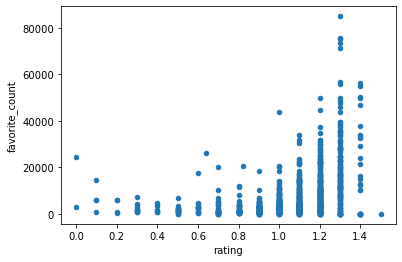

In [122]:
#Scatter plot to show the relationship between dog rating and favorite count 
secondIns = dfmaster_clean.plot.scatter(x='rating', y='favorite_count')

In [123]:
#Create a bar chat to see the differences in the ratings based on the retweet_count
#Group the retweet_count by rating
thirdIns = dfmaster_clean.groupby('img_num')['rating'].mean() 
print(thirdIns)

img_num
1    1.039779
2    1.148276
3    1.154286
4    1.283333
Name: rating, dtype: float64


<AxesSubplot:xlabel='img_num'>

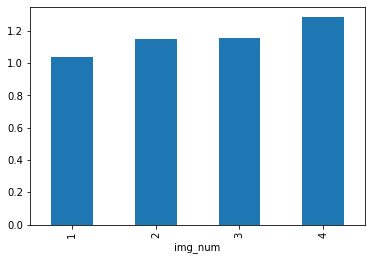

In [118]:
thirdIns.plot(kind='bar', x='img_num', y='rating')

#### Insights
1. It is evident that that in the 'duggo, puppo' stage have the highest mean and generally speaking, dogs in the 'puppo' only, 'doggo' only stage have high ratings mean.
2. The scatter plot indicates that there might be a low but positive relationship between dog_ratings and favorite counts. This might imply that high dog ratings recieved more favorite counts. However, this cannot be established using a scatterplot.
3. The bar chart shows that dogs with **more number of images** tend to have higher 'rating mean' than  those with **lesser number of images**. ~